    Nesse notebook são feitas análises direcionadas à respostas de algumas perguntas feitas anteriormente. Para a conclusão dessas respostas, grande parte das ideias e observações sobre os dados tem como base a análise feita no notebook par desse, não somente, foi feito o uso de alguns gráficos para a demonstração de conclusões e raciocínios

##    Bibliotecas utilizadas

In [271]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##    Importando o csv e o transformando em um DataFrame

In [272]:
data = pd.read_csv(r"/home/vinicius_olzon/Documents/Programacao/Projeto_Final_ICD/1950-2019.csv")
df = pd.DataFrame(data)

##    Análise e tratamento dos dados:
Aqui foram retiradas algumas colunas que não são úteis para as análises a seguir, não somente, é checado a existência de algum elemento nulo ou vazio no DataFrame.

In [273]:
unecessary = ["Unnamed: 0", "len", "age"]
df = df.drop(unecessary, axis = 1)
df.isnull().values.any()

False

In [274]:
df.isna().values.any()

False

##    Como o grau de obscenidade nas letras das músicas têm se comportado ao passar das décadas ?

Antes de responder essa pergunta, é necessário ter em mente algumas infromações acerca do tema.

<AxesSubplot:xlabel='genre', ylabel='obscene'>

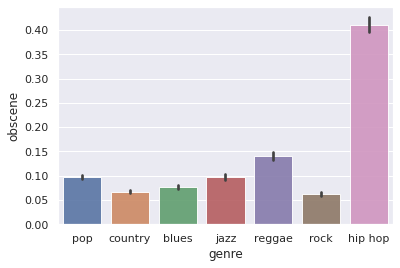

In [275]:
sns.barplot(x="genre", y="obscene", data= df,alpha=0.9)

Ao observar o gráfico acima, fica claro que o gênero musical mais obsceno é o hip-hop. Sobre isso, existe uma dúvida: "Será que a maior incidência no grau de obscenidade das músicas aponta para o hip-hop só porquê existem mais músicas desse gênero musical nos conjuntos de dados?".
Todavia, ao analisar o gráfico abaixo, é visto que a grande maioria das músicas são classificadas como Pop, e mesmo assim o gênero com o maior grau de obscenidade em suas letras continua a ser a Hip-Hop.

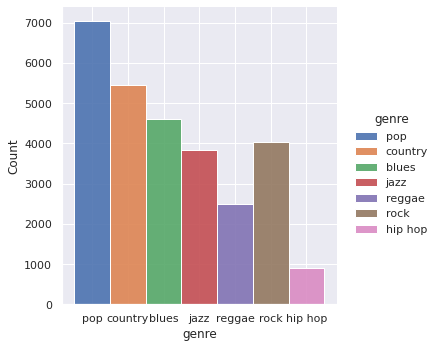

In [276]:
sns.displot(x="genre", data=df, hue = "genre",alpha = 0.9)

Mais a fundo, é visto no gráfico abaixo uma clara demonstração do comportamento do índice de obscenidade nas letras das músicas.

<AxesSubplot:xlabel='release_date', ylabel='obscene'>

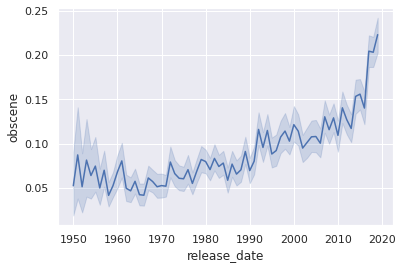

In [277]:
sns.set_theme()
sns.lineplot(x="release_date", y="obscene", data= df)

Este gráfico acima demonstra muito bem como o grau de obscenidade nas letras das músicas se comporta ao longo das décadas.


    Após uma rápida análise, percebe-se que a partir da década de 90, o gráfico sofre uma verticalização não tão significativa, mas já evidente. Porém, após 2010, o grau de obscenidade nas letras das músicas passou a ter um crescimento muito acelerado e fora do padrão. Ou seja, é evidente que as músicas atuais são consideradas muito mais obscenas do que antigamente!

##    Com base nos índices de tristeza e violência verbal das músicas, qual a palavra que mais tende a aparecer nas letras dessas músicas, respectivamente ?

Antes de tudo, é necessário estipular parâmetros sobre os índices de tristeza, os quais são descritos abaixo:

In [278]:
normal_sadness = df[df["sadness"] > 0]
mid_sadness = df[df["sadness"] > 0.2]
high_sadness = df[df["sadness"] > 0.6]

Após isso, é preciso analisar quais palavras mais aparecem com base no crescimento do índice de tristeza nas músicas, para facilitar tal processamento, foi importado o módulo "Counter" da biblioteca "collections"

In [279]:
from collections import Counter
Counter(" ".join(normal_sadness["lyrics"]).split()).most_common(10)

[('know', 33526),
 ('like', 29649),
 ('time', 26504),
 ('come', 23619),
 ('go', 17032),
 ('feel', 16795),
 ('yeah', 16787),
 ('away', 16773),
 ('heart', 16737),
 ('life', 15906)]

In [280]:
from collections import Counter
Counter(" ".join(mid_sadness["lyrics"]).split()).most_common(10)

[('away', 12609),
 ('heart', 12355),
 ('know', 8780),
 ('leave', 6723),
 ('fall', 6709),
 ('break', 6439),
 ('time', 5571),
 ('like', 5173),
 ('feel', 4903),
 ('come', 4889)]

In [281]:
from collections import Counter
Counter(" ".join(high_sadness["lyrics"]).split()).most_common(10)

[('away', 1582),
 ('heart', 1403),
 ('fall', 1099),
 ('break', 1052),
 ('leave', 649),
 ('walk', 627),
 ('tear', 522),
 ('know', 471),
 ('lonely', 379),
 ('hurt', 375)]

### Com isso feito, já é obtida a resposta para a primeira pergunta:

Algumas palavras que mais aparecem com base em um índice de tristeza normal são:
- Vir/ir
- Sentir
- Saber
- Tempo
- Gostar

Algumas palavras que mais aparecem com base em um índice de tristeza acima do normal são:
- Longe
- Coração
- Saber
- Cair
- Deixar

Algumas palavras que mais aparecem com base em um alto índice de tristeza são:
- Longe
- Coração
- Cair
- Quebrar
- Deixar

    Logo, fica claro que algumas palavras como: "Longe", "Coração", "Cair", "Quebrar", "Deixar", têm uma grande tendência a aparecer em músicas tristes. 

Para responder a segunda pergunta, será seguido os mesmos passos, primeiramente é necessário estipular parâmetros sobre os índices de violência, os quais são descritos abaixo:

In [282]:
violent = df[df["violence"] > 0.4]
mid_violence = df[df["violence"] > 0.6]
high_violence = df[df["violence"] > 0.7]

Após isso, é preciso analisar quais palavras mais aparecem com base no crescimento do índice de violência, para facilitar tal processamento, foi importado o módulo "Counter" da biblioteca "collections"

In [283]:
from collections import Counter
Counter(" ".join(violent["lyrics"]).split()).most_common(10)

[('come', 2243),
 ('know', 1945),
 ('head', 1897),
 ('stand', 1868),
 ('like', 1798),
 ('black', 1755),
 ('dead', 1744),
 ('kill', 1404),
 ('fight', 1379),
 ('blood', 1268)]

In [284]:
from collections import Counter
Counter(" ".join(mid_violence["lyrics"]).split()).most_common(10)

[('stand', 463),
 ('come', 448),
 ('fight', 435),
 ('cold', 432),
 ('kill', 424),
 ('blood', 407),
 ('dead', 406),
 ('head', 371),
 ('black', 369),
 ('hell', 297)]

In [285]:
from collections import Counter
Counter(" ".join(high_violence["lyrics"]).split()).most_common(10)

[('fight', 315),
 ('cold', 212),
 ('stand', 205),
 ('kill', 192),
 ('black', 178),
 ('blood', 171),
 ('dead', 170),
 ('sick', 164),
 ('head', 162),
 ('hell', 160)]

### Com isso feito, é obtida a resposta para a segunda pergunta:

Algumas palavras que mais aparecem com base em um índice de violência normal são:
- Ficar
- Saber
- Cabeça
- Gostar
- Escuro

Algumas palavras que mais aparecem com base em um índice de violência acima do normal são:
- Ficar
- Vir
- Lutar
- Frio
- Matar

Algumas palavras que mais aparecem com base em um alto índice de violência são:
- Lutar
- Frio
- Matar
- Escuro
- Sangue

    Logo, fica claro que algumas palavras como: "Lutar", "Frio", "Matar", "Escuro", "Sangue", têm uma grande tendência a aparecer em músicas muito violentas. 